# VAST 2017 MC-1

## Задание
Природный заповедник Бунсонг Лекагуль используется местными жителями и туристами для однодневных поездок, ночевок в кемпингах, а иногда и просто для доступа к основным магистралям на противоположных сторонах заповедника.

Входные кабинки заповедника контролируются с целью получения дохода, а также мониторинга использования. Транспортные средства, въезжающие в заповедник и выезжающие из него, должны платить пошлину в зависимости от количества осей (личный автомобиль, развлекательный прицеп, полуприцеп и т.д.).

Это создает поток данных с отметками времени входа / выхода и типом транспортного средства. Есть также другие места в части, которые регистрируют трафик, проходящий через заповедник. Путешествуя по различным частям заповедника, Митч заметил странное поведение транспортных средств, которое, по его мнению, не соответствует видам посетителей парка, которых он ожидал. Если бы Митч мог каким-то образом анализировать поведение автомобилей в парке с течением времени, это сможет помочь ему в его расследовании.

### Пример исходных данных

### Необходимые импорты

In [1]:
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from SOM import SOM
import seaborn as sb

## Подготовка данных

С помощью языка программирования Python распарсили данные из таблицы, затем объединили в группы сенсоры по Car-Id, тем самым нашли все датчики, которые проехало данное ТС, его путь.

In [2]:
data_set = open("Data/Lekagul Sensor Data.csv", "r")
data = data_set.readlines()
data_set.close()
traces = []
gates = set()
for line in data:
    args = line.split(";")
    gates.add(args[3])
    traces.append(args)
gates = sorted(gates)
groupedTraces = []
for t in traces:
    if t[1] in groupedTraces:
        groupedTraces[t[1]].append(t)
    else:
        groupedTraces[t[1]] = [t]

Вычленяем типа автомобиля из списка путей.

In [3]:
target = []
for x in groupedTraces:
    target.append(groupedTraces[x][1][2])
targets = []
for rec in target:
    if rec == '2P':
        targets.append('7')
    else:
        targets.append(str(rec))
print(targets)

['4', '1', '4', '4', '3', '1', '5', '1', '2', '3', '1', '1', '1', '3', '7', '2', '1', '1', '3', '1', '1', '2', '1', '3', '3', '1', '2', '1', '1', '1', '7', '5', '7', '7', '4', '2', '2', '3', '2', '4', '4', '5', '1', '1', '3', '1', '3', '2', '7', '6', '1', '5', '1', '1', '5', '5', '3', '1', '3', '3', '1', '1', '3', '3', '2', '2', '1', '3', '7', '7', '3', '2', '2', '5', '2', '5', '2', '1', '2', '2', '2', '2', '3', '2', '3', '2', '3', '5', '3', '1', '1', '1', '2', '1', '1', '7', '7', '1', '2', '4', '2', '1', '1', '1', '3', '1', '4', '1', '1', '1', '1', '3', '7', '5', '1', '3', '1', '2', '4', '4', '3', '2', '1', '6', '3', '1', '6', '1', '1', '3', '1', '7', '7', '3', '2', '2', '1', '1', '2', '4', '7', '1', '4', '2', '5', '2', '7', '1', '2', '2', '4', '5', '1', '4', '1', '2', '4', '2', '1', '7', '1', '1', '1', '2', '1', '2', '1', '2', '2', '7', '2', '2', '1', '3', '1', '3', '3', '7', '2', '1', '1', '2', '4', '1', '3', '1', '2', '2', '4', '2', '4', '2', '5', '5', '1', '1', '1', '4', '4', '1',

Отнормировали датчики по общему количеству пройденных датчиков (если транспортное средство никак не взаимодействовало с сенсором - присваиваем значение 0). В итоге получаем вектор, где координатами являются сенсоры со значениями [0, 1].

In [8]:
vectors = []
for name, gt in groupedTraces.items():
    groupGates = np.zeros(len(gates))
    for t in gt:
        groupGates[gates.index(t[3])] += 1
    vector = []
    for rec in groupGates:
        vector.append(str(rec))
        # vectors.write(";")
    vectors.append(vector)

for vector in vectors:
    print(vector)

Epoch 0;    Neuron [2, 11];    	Sigma: 10.0000;    alpha: 0.6000
Epoch 1;    Neuron [6, 13];    	Sigma: 10.0000;    alpha: 0.6000
Epoch 2;    Neuron [2, 17];    	Sigma: 10.0000;    alpha: 0.6000
Epoch 3;    Neuron [3, 16];    	Sigma: 10.0000;    alpha: 0.6000
Epoch 4;    Neuron [17, 1];    	Sigma: 10.0000;    alpha: 0.6000
Epoch 5;    Neuron [6, 10];    	Sigma: 10.0000;    alpha: 0.6000
Epoch 6;    Neuron [12, 11];    	Sigma: 10.0000;    alpha: 0.6000
Epoch 7;    Neuron [9, 15];    	Sigma: 10.0000;    alpha: 0.6000
Epoch 8;    Neuron [12, 8];    	Sigma: 10.0000;    alpha: 0.6000
Epoch 9;    Neuron [10, 18];    	Sigma: 10.0000;    alpha: 0.6000
Epoch 10;    Neuron [5, 19];    	Sigma: 10.0000;    alpha: 0.6000
Epoch 11;    Neuron [15, 8];    	Sigma: 10.0000;    alpha: 0.6000
Epoch 12;    Neuron [0, 16];    	Sigma: 10.0000;    alpha: 0.6000
Epoch 13;    Neuron [6, 3];    	Sigma: 10.0000;    alpha: 0.6000
Epoch 14;    Neuron [12, 11];    	Sigma: 10.0000;    alpha: 0.6000
Epoch 15;    Neuro

Epoch 318;    Neuron [15, 9];    	Sigma: 9.9998;    alpha: 0.6000
Epoch 319;    Neuron [2, 14];    	Sigma: 9.9998;    alpha: 0.6000
Epoch 320;    Neuron [2, 5];    	Sigma: 9.9998;    alpha: 0.6000
Epoch 321;    Neuron [14, 9];    	Sigma: 9.9998;    alpha: 0.6000
Epoch 322;    Neuron [9, 19];    	Sigma: 9.9998;    alpha: 0.6000
Epoch 323;    Neuron [18, 16];    	Sigma: 9.9998;    alpha: 0.6000
Epoch 324;    Neuron [8, 0];    	Sigma: 9.9998;    alpha: 0.6000
Epoch 325;    Neuron [18, 15];    	Sigma: 9.9998;    alpha: 0.6000
Epoch 326;    Neuron [4, 2];    	Sigma: 9.9998;    alpha: 0.6000
Epoch 327;    Neuron [8, 13];    	Sigma: 9.9998;    alpha: 0.6000
Epoch 328;    Neuron [14, 7];    	Sigma: 9.9998;    alpha: 0.6000
Epoch 329;    Neuron [19, 9];    	Sigma: 9.9998;    alpha: 0.6000
Epoch 330;    Neuron [8, 11];    	Sigma: 9.9998;    alpha: 0.6000
Epoch 331;    Neuron [10, 19];    	Sigma: 9.9998;    alpha: 0.6000
Epoch 332;    Neuron [14, 6];    	Sigma: 9.9998;    alpha: 0.6000
Epoch 333;

Epoch 656;    Neuron [7, 19];    	Sigma: 9.9970;    alpha: 0.5998
Epoch 657;    Neuron [10, 9];    	Sigma: 9.9970;    alpha: 0.5998
Epoch 658;    Neuron [7, 19];    	Sigma: 9.9970;    alpha: 0.5998
Epoch 659;    Neuron [16, 1];    	Sigma: 9.9970;    alpha: 0.5998
Epoch 660;    Neuron [2, 9];    	Sigma: 9.9970;    alpha: 0.5998
Epoch 661;    Neuron [16, 0];    	Sigma: 9.9969;    alpha: 0.5998
Epoch 662;    Neuron [6, 18];    	Sigma: 9.9969;    alpha: 0.5998
Epoch 663;    Neuron [7, 16];    	Sigma: 9.9969;    alpha: 0.5998
Epoch 664;    Neuron [0, 9];    	Sigma: 9.9969;    alpha: 0.5998
Epoch 665;    Neuron [3, 19];    	Sigma: 9.9969;    alpha: 0.5998
Epoch 666;    Neuron [13, 15];    	Sigma: 9.9969;    alpha: 0.5998
Epoch 667;    Neuron [16, 7];    	Sigma: 9.9968;    alpha: 0.5998
Epoch 668;    Neuron [2, 0];    	Sigma: 9.9968;    alpha: 0.5998
Epoch 669;    Neuron [16, 13];    	Sigma: 9.9968;    alpha: 0.5998
Epoch 670;    Neuron [9, 10];    	Sigma: 9.9968;    alpha: 0.5998
Epoch 671; 

Epoch 1010;    Neuron [2, 5];    	Sigma: 9.9834;    alpha: 0.5990
Epoch 1011;    Neuron [7, 9];    	Sigma: 9.9833;    alpha: 0.5990
Epoch 1012;    Neuron [13, 19];    	Sigma: 9.9832;    alpha: 0.5990
Epoch 1013;    Neuron [19, 14];    	Sigma: 9.9832;    alpha: 0.5990
Epoch 1014;    Neuron [19, 15];    	Sigma: 9.9831;    alpha: 0.5990
Epoch 1015;    Neuron [13, 17];    	Sigma: 9.9830;    alpha: 0.5990
Epoch 1016;    Neuron [18, 7];    	Sigma: 9.9830;    alpha: 0.5990
Epoch 1017;    Neuron [4, 3];    	Sigma: 9.9829;    alpha: 0.5990
Epoch 1018;    Neuron [8, 11];    	Sigma: 9.9828;    alpha: 0.5990
Epoch 1019;    Neuron [19, 5];    	Sigma: 9.9828;    alpha: 0.5990
Epoch 1020;    Neuron [14, 1];    	Sigma: 9.9827;    alpha: 0.5990
Epoch 1021;    Neuron [3, 5];    	Sigma: 9.9826;    alpha: 0.5990
Epoch 1022;    Neuron [2, 15];    	Sigma: 9.9826;    alpha: 0.5990
Epoch 1023;    Neuron [12, 19];    	Sigma: 9.9825;    alpha: 0.5990
Epoch 1024;    Neuron [0, 13];    	Sigma: 9.9824;    alpha: 0

Epoch 1370;    Neuron [2, 11];    	Sigma: 9.9439;    alpha: 0.5966
Epoch 1371;    Neuron [3, 3];    	Sigma: 9.9438;    alpha: 0.5966
Epoch 1372;    Neuron [8, 2];    	Sigma: 9.9436;    alpha: 0.5966
Epoch 1373;    Neuron [3, 5];    	Sigma: 9.9434;    alpha: 0.5966
Epoch 1374;    Neuron [8, 17];    	Sigma: 9.9433;    alpha: 0.5966
Epoch 1375;    Neuron [18, 13];    	Sigma: 9.9431;    alpha: 0.5966
Epoch 1376;    Neuron [3, 3];    	Sigma: 9.9429;    alpha: 0.5966
Epoch 1377;    Neuron [17, 13];    	Sigma: 9.9428;    alpha: 0.5966
Epoch 1378;    Neuron [8, 17];    	Sigma: 9.9426;    alpha: 0.5966
Epoch 1379;    Neuron [12, 9];    	Sigma: 9.9425;    alpha: 0.5965
Epoch 1380;    Neuron [10, 19];    	Sigma: 9.9423;    alpha: 0.5965
Epoch 1381;    Neuron [9, 18];    	Sigma: 9.9421;    alpha: 0.5965
Epoch 1382;    Neuron [6, 9];    	Sigma: 9.9420;    alpha: 0.5965
Epoch 1383;    Neuron [8, 7];    	Sigma: 9.9418;    alpha: 0.5965
Epoch 1384;    Neuron [16, 10];    	Sigma: 9.9416;    alpha: 0.59

Epoch 1732;    Neuron [4, 0];    	Sigma: 9.8580;    alpha: 0.5915
Epoch 1733;    Neuron [4, 13];    	Sigma: 9.8577;    alpha: 0.5915
Epoch 1734;    Neuron [16, 11];    	Sigma: 9.8574;    alpha: 0.5914
Epoch 1735;    Neuron [19, 4];    	Sigma: 9.8570;    alpha: 0.5914
Epoch 1736;    Neuron [12, 1];    	Sigma: 9.8567;    alpha: 0.5914
Epoch 1737;    Neuron [9, 11];    	Sigma: 9.8564;    alpha: 0.5914
Epoch 1738;    Neuron [3, 0];    	Sigma: 9.8561;    alpha: 0.5914
Epoch 1739;    Neuron [5, 0];    	Sigma: 9.8557;    alpha: 0.5913
Epoch 1740;    Neuron [15, 3];    	Sigma: 9.8554;    alpha: 0.5913
Epoch 1741;    Neuron [5, 13];    	Sigma: 9.8551;    alpha: 0.5913
Epoch 1742;    Neuron [10, 6];    	Sigma: 9.8547;    alpha: 0.5913
Epoch 1743;    Neuron [6, 13];    	Sigma: 9.8544;    alpha: 0.5913
Epoch 1744;    Neuron [13, 8];    	Sigma: 9.8541;    alpha: 0.5912
Epoch 1745;    Neuron [5, 3];    	Sigma: 9.8538;    alpha: 0.5912
Epoch 1746;    Neuron [15, 16];    	Sigma: 9.8534;    alpha: 0.59

Epoch 2084;    Neuron [14, 16];    	Sigma: 9.7069;    alpha: 0.5824
Epoch 2085;    Neuron [16, 18];    	Sigma: 9.7064;    alpha: 0.5824
Epoch 2086;    Neuron [10, 9];    	Sigma: 9.7058;    alpha: 0.5824
Epoch 2087;    Neuron [11, 3];    	Sigma: 9.7053;    alpha: 0.5823
Epoch 2088;    Neuron [17, 16];    	Sigma: 9.7047;    alpha: 0.5823
Epoch 2089;    Neuron [3, 3];    	Sigma: 9.7042;    alpha: 0.5823
Epoch 2090;    Neuron [6, 1];    	Sigma: 9.7036;    alpha: 0.5822
Epoch 2091;    Neuron [4, 13];    	Sigma: 9.7031;    alpha: 0.5822
Epoch 2092;    Neuron [16, 16];    	Sigma: 9.7025;    alpha: 0.5822
Epoch 2093;    Neuron [14, 10];    	Sigma: 9.7020;    alpha: 0.5821
Epoch 2094;    Neuron [10, 6];    	Sigma: 9.7014;    alpha: 0.5821
Epoch 2095;    Neuron [6, 0];    	Sigma: 9.7009;    alpha: 0.5821
Epoch 2096;    Neuron [16, 6];    	Sigma: 9.7003;    alpha: 0.5820
Epoch 2097;    Neuron [14, 14];    	Sigma: 9.6998;    alpha: 0.5820
Epoch 2098;    Neuron [10, 10];    	Sigma: 9.6992;    alpha

Epoch 2453;    Neuron [10, 9];    	Sigma: 9.4522;    alpha: 0.5671
Epoch 2454;    Neuron [13, 5];    	Sigma: 9.4514;    alpha: 0.5671
Epoch 2455;    Neuron [17, 8];    	Sigma: 9.4505;    alpha: 0.5670
Epoch 2456;    Neuron [0, 18];    	Sigma: 9.4497;    alpha: 0.5670
Epoch 2457;    Neuron [4, 2];    	Sigma: 9.4488;    alpha: 0.5669
Epoch 2458;    Neuron [10, 15];    	Sigma: 9.4480;    alpha: 0.5669
Epoch 2459;    Neuron [14, 1];    	Sigma: 9.4471;    alpha: 0.5668
Epoch 2460;    Neuron [14, 15];    	Sigma: 9.4463;    alpha: 0.5668
Epoch 2461;    Neuron [15, 3];    	Sigma: 9.4454;    alpha: 0.5667
Epoch 2462;    Neuron [1, 17];    	Sigma: 9.4446;    alpha: 0.5667
Epoch 2463;    Neuron [11, 6];    	Sigma: 9.4437;    alpha: 0.5666
Epoch 2464;    Neuron [9, 12];    	Sigma: 9.4429;    alpha: 0.5666
Epoch 2465;    Neuron [18, 13];    	Sigma: 9.4420;    alpha: 0.5665
Epoch 2466;    Neuron [1, 0];    	Sigma: 9.4412;    alpha: 0.5665
Epoch 2467;    Neuron [15, 3];    	Sigma: 9.4403;    alpha: 0

Epoch 2829;    Neuron [0, 17];    	Sigma: 9.0701;    alpha: 0.5442
Epoch 2830;    Neuron [5, 1];    	Sigma: 9.0689;    alpha: 0.5441
Epoch 2831;    Neuron [11, 19];    	Sigma: 9.0677;    alpha: 0.5441
Epoch 2832;    Neuron [16, 9];    	Sigma: 9.0665;    alpha: 0.5440
Epoch 2833;    Neuron [2, 14];    	Sigma: 9.0653;    alpha: 0.5439
Epoch 2834;    Neuron [9, 8];    	Sigma: 9.0641;    alpha: 0.5438
Epoch 2835;    Neuron [18, 15];    	Sigma: 9.0629;    alpha: 0.5438
Epoch 2836;    Neuron [9, 8];    	Sigma: 9.0617;    alpha: 0.5437
Epoch 2837;    Neuron [5, 3];    	Sigma: 9.0605;    alpha: 0.5436
Epoch 2838;    Neuron [4, 1];    	Sigma: 9.0593;    alpha: 0.5436
Epoch 2839;    Neuron [2, 13];    	Sigma: 9.0581;    alpha: 0.5435
Epoch 2840;    Neuron [13, 14];    	Sigma: 9.0569;    alpha: 0.5434
Epoch 2841;    Neuron [8, 4];    	Sigma: 9.0557;    alpha: 0.5433
Epoch 2842;    Neuron [18, 16];    	Sigma: 9.0545;    alpha: 0.5433
Epoch 2843;    Neuron [2, 11];    	Sigma: 9.0533;    alpha: 0.54

Epoch 3238;    Neuron [8, 6];    	Sigma: 8.5037;    alpha: 0.5102
Epoch 3239;    Neuron [10, 10];    	Sigma: 8.5022;    alpha: 0.5101
Epoch 3240;    Neuron [6, 12];    	Sigma: 8.5006;    alpha: 0.5100
Epoch 3241;    Neuron [2, 19];    	Sigma: 8.4990;    alpha: 0.5099
Epoch 3242;    Neuron [0, 8];    	Sigma: 8.4974;    alpha: 0.5098
Epoch 3243;    Neuron [17, 15];    	Sigma: 8.4959;    alpha: 0.5098
Epoch 3244;    Neuron [6, 18];    	Sigma: 8.4943;    alpha: 0.5097
Epoch 3245;    Neuron [0, 6];    	Sigma: 8.4927;    alpha: 0.5096
Epoch 3246;    Neuron [16, 15];    	Sigma: 8.4911;    alpha: 0.5095
Epoch 3247;    Neuron [1, 6];    	Sigma: 8.4895;    alpha: 0.5094
Epoch 3248;    Neuron [7, 11];    	Sigma: 8.4880;    alpha: 0.5093
Epoch 3249;    Neuron [15, 3];    	Sigma: 8.4864;    alpha: 0.5092
Epoch 3250;    Neuron [8, 18];    	Sigma: 8.4848;    alpha: 0.5091
Epoch 3251;    Neuron [11, 1];    	Sigma: 8.4832;    alpha: 0.5090
Epoch 3252;    Neuron [9, 17];    	Sigma: 8.4816;    alpha: 0.5

Epoch 3607;    Neuron [1, 17];    	Sigma: 7.8682;    alpha: 0.4721
Epoch 3608;    Neuron [12, 9];    	Sigma: 7.8663;    alpha: 0.4720
Epoch 3609;    Neuron [13, 10];    	Sigma: 7.8645;    alpha: 0.4719
Epoch 3610;    Neuron [17, 3];    	Sigma: 7.8626;    alpha: 0.4718
Epoch 3611;    Neuron [5, 0];    	Sigma: 7.8607;    alpha: 0.4716
Epoch 3612;    Neuron [9, 3];    	Sigma: 7.8589;    alpha: 0.4715
Epoch 3613;    Neuron [18, 4];    	Sigma: 7.8570;    alpha: 0.4714
Epoch 3614;    Neuron [15, 18];    	Sigma: 7.8551;    alpha: 0.4713
Epoch 3615;    Neuron [8, 3];    	Sigma: 7.8533;    alpha: 0.4712
Epoch 3616;    Neuron [18, 5];    	Sigma: 7.8514;    alpha: 0.4711
Epoch 3617;    Neuron [14, 5];    	Sigma: 7.8495;    alpha: 0.4710
Epoch 3618;    Neuron [19, 13];    	Sigma: 7.8477;    alpha: 0.4709
Epoch 3619;    Neuron [5, 19];    	Sigma: 7.8458;    alpha: 0.4707
Epoch 3620;    Neuron [15, 17];    	Sigma: 7.8439;    alpha: 0.4706
Epoch 3621;    Neuron [3, 11];    	Sigma: 7.8421;    alpha: 0

Epoch 3991;    Neuron [0, 13];    	Sigma: 7.1119;    alpha: 0.4267
Epoch 3992;    Neuron [9, 15];    	Sigma: 7.1099;    alpha: 0.4266
Epoch 3993;    Neuron [17, 8];    	Sigma: 7.1078;    alpha: 0.4265
Epoch 3994;    Neuron [6, 15];    	Sigma: 7.1058;    alpha: 0.4263
Epoch 3995;    Neuron [16, 5];    	Sigma: 7.1037;    alpha: 0.4262
Epoch 3996;    Neuron [9, 0];    	Sigma: 7.1016;    alpha: 0.4261
Epoch 3997;    Neuron [5, 6];    	Sigma: 7.0996;    alpha: 0.4260
Epoch 3998;    Neuron [11, 19];    	Sigma: 7.0975;    alpha: 0.4259
Epoch 3999;    Neuron [3, 18];    	Sigma: 7.0954;    alpha: 0.4257
Epoch 4000;    Neuron [2, 14];    	Sigma: 7.0934;    alpha: 0.4256
Epoch 4001;    Neuron [11, 15];    	Sigma: 7.0913;    alpha: 0.4255
Epoch 4002;    Neuron [0, 12];    	Sigma: 7.0893;    alpha: 0.4254
Epoch 4003;    Neuron [12, 11];    	Sigma: 7.0872;    alpha: 0.4252
Epoch 4004;    Neuron [14, 19];    	Sigma: 7.0851;    alpha: 0.4251
Epoch 4005;    Neuron [19, 3];    	Sigma: 7.0831;    alpha: 

Epoch 4404;    Neuron [4, 2];    	Sigma: 6.2417;    alpha: 0.3745
Epoch 4405;    Neuron [7, 13];    	Sigma: 6.2396;    alpha: 0.3744
Epoch 4406;    Neuron [12, 19];    	Sigma: 6.2375;    alpha: 0.3742
Epoch 4407;    Neuron [15, 6];    	Sigma: 6.2353;    alpha: 0.3741
Epoch 4408;    Neuron [5, 1];    	Sigma: 6.2332;    alpha: 0.3740
Epoch 4409;    Neuron [0, 16];    	Sigma: 6.2311;    alpha: 0.3739
Epoch 4410;    Neuron [13, 7];    	Sigma: 6.2289;    alpha: 0.3737
Epoch 4411;    Neuron [0, 19];    	Sigma: 6.2268;    alpha: 0.3736
Epoch 4412;    Neuron [6, 12];    	Sigma: 6.2247;    alpha: 0.3735
Epoch 4413;    Neuron [4, 3];    	Sigma: 6.2226;    alpha: 0.3734
Epoch 4414;    Neuron [19, 16];    	Sigma: 6.2204;    alpha: 0.3732
Epoch 4415;    Neuron [4, 3];    	Sigma: 6.2183;    alpha: 0.3731
Epoch 4416;    Neuron [10, 8];    	Sigma: 6.2162;    alpha: 0.3730
Epoch 4417;    Neuron [9, 0];    	Sigma: 6.2140;    alpha: 0.3728
Epoch 4418;    Neuron [5, 10];    	Sigma: 6.2119;    alpha: 0.372

Epoch 4805;    Neuron [16, 2];    	Sigma: 5.3960;    alpha: 0.3238
Epoch 4806;    Neuron [8, 19];    	Sigma: 5.3939;    alpha: 0.3236
Epoch 4807;    Neuron [12, 15];    	Sigma: 5.3918;    alpha: 0.3235
Epoch 4808;    Neuron [3, 6];    	Sigma: 5.3898;    alpha: 0.3234
Epoch 4809;    Neuron [11, 8];    	Sigma: 5.3877;    alpha: 0.3233
Epoch 4810;    Neuron [6, 0];    	Sigma: 5.3856;    alpha: 0.3231
Epoch 4811;    Neuron [12, 7];    	Sigma: 5.3836;    alpha: 0.3230
Epoch 4812;    Neuron [13, 5];    	Sigma: 5.3815;    alpha: 0.3229
Epoch 4813;    Neuron [3, 11];    	Sigma: 5.3794;    alpha: 0.3228
Epoch 4814;    Neuron [11, 8];    	Sigma: 5.3774;    alpha: 0.3226
Epoch 4815;    Neuron [19, 0];    	Sigma: 5.3753;    alpha: 0.3225
Epoch 4816;    Neuron [9, 4];    	Sigma: 5.3732;    alpha: 0.3224
Epoch 4817;    Neuron [9, 3];    	Sigma: 5.3712;    alpha: 0.3223
Epoch 4818;    Neuron [18, 0];    	Sigma: 5.3691;    alpha: 0.3221
Epoch 4819;    Neuron [16, 14];    	Sigma: 5.3671;    alpha: 0.32

Epoch 5215;    Neuron [3, 3];    	Sigma: 4.5790;    alpha: 0.2747
Epoch 5216;    Neuron [4, 16];    	Sigma: 4.5771;    alpha: 0.2746
Epoch 5217;    Neuron [15, 17];    	Sigma: 4.5752;    alpha: 0.2745
Epoch 5218;    Neuron [15, 5];    	Sigma: 4.5733;    alpha: 0.2744
Epoch 5219;    Neuron [3, 3];    	Sigma: 4.5714;    alpha: 0.2743
Epoch 5220;    Neuron [17, 18];    	Sigma: 4.5695;    alpha: 0.2742
Epoch 5221;    Neuron [10, 8];    	Sigma: 4.5676;    alpha: 0.2741
Epoch 5222;    Neuron [9, 16];    	Sigma: 4.5657;    alpha: 0.2739
Epoch 5223;    Neuron [15, 12];    	Sigma: 4.5638;    alpha: 0.2738
Epoch 5224;    Neuron [10, 8];    	Sigma: 4.5619;    alpha: 0.2737
Epoch 5225;    Neuron [1, 11];    	Sigma: 4.5600;    alpha: 0.2736
Epoch 5226;    Neuron [12, 1];    	Sigma: 4.5581;    alpha: 0.2735
Epoch 5227;    Neuron [9, 13];    	Sigma: 4.5562;    alpha: 0.2734
Epoch 5228;    Neuron [16, 17];    	Sigma: 4.5543;    alpha: 0.2733
Epoch 5229;    Neuron [10, 9];    	Sigma: 4.5524;    alpha: 

Epoch 5561;    Neuron [14, 19];    	Sigma: 3.9514;    alpha: 0.2371
Epoch 5562;    Neuron [4, 17];    	Sigma: 3.9497;    alpha: 0.2370
Epoch 5563;    Neuron [16, 4];    	Sigma: 3.9480;    alpha: 0.2369
Epoch 5564;    Neuron [16, 5];    	Sigma: 3.9462;    alpha: 0.2368
Epoch 5565;    Neuron [18, 14];    	Sigma: 3.9445;    alpha: 0.2367
Epoch 5566;    Neuron [19, 10];    	Sigma: 3.9428;    alpha: 0.2366
Epoch 5567;    Neuron [12, 7];    	Sigma: 3.9411;    alpha: 0.2365
Epoch 5568;    Neuron [12, 1];    	Sigma: 3.9394;    alpha: 0.2364
Epoch 5569;    Neuron [0, 19];    	Sigma: 3.9377;    alpha: 0.2363
Epoch 5570;    Neuron [4, 17];    	Sigma: 3.9359;    alpha: 0.2362
Epoch 5571;    Neuron [17, 4];    	Sigma: 3.9342;    alpha: 0.2361
Epoch 5572;    Neuron [0, 15];    	Sigma: 3.9325;    alpha: 0.2360
Epoch 5573;    Neuron [6, 11];    	Sigma: 3.9308;    alpha: 0.2358
Epoch 5574;    Neuron [10, 9];    	Sigma: 3.9291;    alpha: 0.2357
Epoch 5575;    Neuron [0, 8];    	Sigma: 3.9274;    alpha: 

Epoch 5955;    Neuron [15, 18];    	Sigma: 3.3191;    alpha: 0.1991
Epoch 5956;    Neuron [2, 7];    	Sigma: 3.3176;    alpha: 0.1991
Epoch 5957;    Neuron [13, 1];    	Sigma: 3.3161;    alpha: 0.1990
Epoch 5958;    Neuron [2, 7];    	Sigma: 3.3146;    alpha: 0.1989
Epoch 5959;    Neuron [6, 2];    	Sigma: 3.3131;    alpha: 0.1988
Epoch 5960;    Neuron [15, 10];    	Sigma: 3.3116;    alpha: 0.1987
Epoch 5961;    Neuron [10, 10];    	Sigma: 3.3101;    alpha: 0.1986
Epoch 5962;    Neuron [16, 14];    	Sigma: 3.3087;    alpha: 0.1985
Epoch 5963;    Neuron [10, 0];    	Sigma: 3.3072;    alpha: 0.1984
Epoch 5964;    Neuron [13, 1];    	Sigma: 3.3057;    alpha: 0.1983
Epoch 5965;    Neuron [10, 4];    	Sigma: 3.3042;    alpha: 0.1983
Epoch 5966;    Neuron [10, 4];    	Sigma: 3.3027;    alpha: 0.1982
Epoch 5967;    Neuron [0, 11];    	Sigma: 3.3012;    alpha: 0.1981
Epoch 5968;    Neuron [10, 4];    	Sigma: 3.2998;    alpha: 0.1980
Epoch 5969;    Neuron [0, 19];    	Sigma: 3.2983;    alpha: 0

Epoch 6363;    Neuron [1, 1];    	Sigma: 2.7595;    alpha: 0.1656
Epoch 6364;    Neuron [3, 14];    	Sigma: 2.7582;    alpha: 0.1655
Epoch 6365;    Neuron [15, 19];    	Sigma: 2.7570;    alpha: 0.1654
Epoch 6366;    Neuron [10, 19];    	Sigma: 2.7557;    alpha: 0.1653
Epoch 6367;    Neuron [0, 19];    	Sigma: 2.7545;    alpha: 0.1653
Epoch 6368;    Neuron [9, 14];    	Sigma: 2.7532;    alpha: 0.1652
Epoch 6369;    Neuron [7, 7];    	Sigma: 2.7520;    alpha: 0.1651
Epoch 6370;    Neuron [16, 15];    	Sigma: 2.7507;    alpha: 0.1650
Epoch 6371;    Neuron [11, 15];    	Sigma: 2.7495;    alpha: 0.1650
Epoch 6372;    Neuron [7, 7];    	Sigma: 2.7482;    alpha: 0.1649
Epoch 6373;    Neuron [10, 15];    	Sigma: 2.7470;    alpha: 0.1648
Epoch 6374;    Neuron [4, 19];    	Sigma: 2.7457;    alpha: 0.1647
Epoch 6375;    Neuron [3, 4];    	Sigma: 2.7445;    alpha: 0.1647
Epoch 6376;    Neuron [15, 19];    	Sigma: 2.7432;    alpha: 0.1646
Epoch 6377;    Neuron [6, 1];    	Sigma: 2.7420;    alpha: 0

Epoch 6683;    Neuron [6, 2];    	Sigma: 2.3850;    alpha: 0.1431
Epoch 6684;    Neuron [17, 15];    	Sigma: 2.3839;    alpha: 0.1430
Epoch 6685;    Neuron [7, 6];    	Sigma: 2.3828;    alpha: 0.1430
Epoch 6686;    Neuron [6, 2];    	Sigma: 2.3817;    alpha: 0.1429
Epoch 6687;    Neuron [15, 19];    	Sigma: 2.3807;    alpha: 0.1428
Epoch 6688;    Neuron [12, 14];    	Sigma: 2.3796;    alpha: 0.1428
Epoch 6689;    Neuron [13, 2];    	Sigma: 2.3785;    alpha: 0.1427
Epoch 6690;    Neuron [4, 0];    	Sigma: 2.3774;    alpha: 0.1426
Epoch 6691;    Neuron [4, 4];    	Sigma: 2.3763;    alpha: 0.1426
Epoch 6692;    Neuron [7, 6];    	Sigma: 2.3752;    alpha: 0.1425
Epoch 6693;    Neuron [3, 10];    	Sigma: 2.3742;    alpha: 0.1424
Epoch 6694;    Neuron [18, 11];    	Sigma: 2.3731;    alpha: 0.1424
Epoch 6695;    Neuron [6, 2];    	Sigma: 2.3720;    alpha: 0.1423
Epoch 6696;    Neuron [19, 9];    	Sigma: 2.3709;    alpha: 0.1423
Epoch 6697;    Neuron [6, 13];    	Sigma: 2.3698;    alpha: 0.142

Epoch 7063;    Neuron [16, 9];    	Sigma: 2.0067;    alpha: 0.1204
Epoch 7064;    Neuron [1, 1];    	Sigma: 2.0058;    alpha: 0.1203
Epoch 7065;    Neuron [0, 12];    	Sigma: 2.0049;    alpha: 0.1203
Epoch 7066;    Neuron [13, 11];    	Sigma: 2.0040;    alpha: 0.1202
Epoch 7067;    Neuron [1, 13];    	Sigma: 2.0030;    alpha: 0.1202
Epoch 7068;    Neuron [10, 18];    	Sigma: 2.0021;    alpha: 0.1201
Epoch 7069;    Neuron [17, 10];    	Sigma: 2.0012;    alpha: 0.1201
Epoch 7070;    Neuron [11, 0];    	Sigma: 2.0003;    alpha: 0.1200
Epoch 7071;    Neuron [2, 2];    	Sigma: 1.9994;    alpha: 0.1200
Epoch 7072;    Neuron [12, 3];    	Sigma: 1.9985;    alpha: 0.1199
Epoch 7073;    Neuron [11, 7];    	Sigma: 1.9976;    alpha: 0.1199
Epoch 7074;    Neuron [13, 16];    	Sigma: 1.9967;    alpha: 0.1198
Epoch 7075;    Neuron [11, 14];    	Sigma: 1.9958;    alpha: 0.1197
Epoch 7076;    Neuron [9, 4];    	Sigma: 1.9949;    alpha: 0.1197
Epoch 7077;    Neuron [1, 6];    	Sigma: 1.9940;    alpha: 0

Epoch 7460;    Neuron [2, 8];    	Sigma: 1.6786;    alpha: 0.1007
Epoch 7461;    Neuron [3, 0];    	Sigma: 1.6779;    alpha: 0.1007
Epoch 7462;    Neuron [3, 9];    	Sigma: 1.6771;    alpha: 0.1006
Epoch 7463;    Neuron [9, 15];    	Sigma: 1.6764;    alpha: 0.1006
Epoch 7464;    Neuron [3, 19];    	Sigma: 1.6756;    alpha: 0.1005
Epoch 7465;    Neuron [9, 4];    	Sigma: 1.6749;    alpha: 0.1005
Epoch 7466;    Neuron [19, 12];    	Sigma: 1.6741;    alpha: 0.1004
Epoch 7467;    Neuron [16, 15];    	Sigma: 1.6734;    alpha: 0.1004
Epoch 7468;    Neuron [10, 15];    	Sigma: 1.6726;    alpha: 0.1004
Epoch 7469;    Neuron [9, 4];    	Sigma: 1.6719;    alpha: 0.1003
Epoch 7470;    Neuron [7, 18];    	Sigma: 1.6711;    alpha: 0.1003
Epoch 7471;    Neuron [7, 18];    	Sigma: 1.6704;    alpha: 0.1002
Epoch 7472;    Neuron [2, 8];    	Sigma: 1.6696;    alpha: 0.1002
Epoch 7473;    Neuron [13, 17];    	Sigma: 1.6689;    alpha: 0.1001
Epoch 7474;    Neuron [14, 2];    	Sigma: 1.6682;    alpha: 0.10

Epoch 7831;    Neuron [7, 5];    	Sigma: 1.4246;    alpha: 0.0855
Epoch 7832;    Neuron [3, 12];    	Sigma: 1.4240;    alpha: 0.0854
Epoch 7833;    Neuron [5, 11];    	Sigma: 1.4233;    alpha: 0.0854
Epoch 7834;    Neuron [1, 6];    	Sigma: 1.4227;    alpha: 0.0854
Epoch 7835;    Neuron [6, 6];    	Sigma: 1.4221;    alpha: 0.0853
Epoch 7836;    Neuron [3, 9];    	Sigma: 1.4215;    alpha: 0.0853
Epoch 7837;    Neuron [9, 15];    	Sigma: 1.4209;    alpha: 0.0853
Epoch 7838;    Neuron [16, 4];    	Sigma: 1.4202;    alpha: 0.0852
Epoch 7839;    Neuron [4, 4];    	Sigma: 1.4196;    alpha: 0.0852
Epoch 7840;    Neuron [15, 19];    	Sigma: 1.4190;    alpha: 0.0851
Epoch 7841;    Neuron [13, 17];    	Sigma: 1.4184;    alpha: 0.0851
Epoch 7842;    Neuron [0, 3];    	Sigma: 1.4178;    alpha: 0.0851
Epoch 7843;    Neuron [12, 10];    	Sigma: 1.4171;    alpha: 0.0850
Epoch 7844;    Neuron [18, 11];    	Sigma: 1.4165;    alpha: 0.0850
Epoch 7845;    Neuron [15, 19];    	Sigma: 1.4159;    alpha: 0.0

Epoch 8201;    Neuron [12, 3];    	Sigma: 1.2135;    alpha: 0.0728
Epoch 8202;    Neuron [7, 18];    	Sigma: 1.2130;    alpha: 0.0728
Epoch 8203;    Neuron [11, 7];    	Sigma: 1.2125;    alpha: 0.0727
Epoch 8204;    Neuron [4, 4];    	Sigma: 1.2120;    alpha: 0.0727
Epoch 8205;    Neuron [0, 14];    	Sigma: 1.2115;    alpha: 0.0727
Epoch 8206;    Neuron [2, 8];    	Sigma: 1.2109;    alpha: 0.0727
Epoch 8207;    Neuron [6, 2];    	Sigma: 1.2104;    alpha: 0.0726
Epoch 8208;    Neuron [4, 4];    	Sigma: 1.2099;    alpha: 0.0726
Epoch 8209;    Neuron [1, 6];    	Sigma: 1.2094;    alpha: 0.0726
Epoch 8210;    Neuron [13, 13];    	Sigma: 1.2089;    alpha: 0.0725
Epoch 8211;    Neuron [11, 7];    	Sigma: 1.2083;    alpha: 0.0725
Epoch 8212;    Neuron [5, 9];    	Sigma: 1.2078;    alpha: 0.0725
Epoch 8213;    Neuron [9, 10];    	Sigma: 1.2073;    alpha: 0.0724
Epoch 8214;    Neuron [6, 2];    	Sigma: 1.2068;    alpha: 0.0724
Epoch 8215;    Neuron [9, 4];    	Sigma: 1.2063;    alpha: 0.0724
Ep

Epoch 8581;    Neuron [6, 18];    	Sigma: 1.0332;    alpha: 0.0620
Epoch 8582;    Neuron [16, 9];    	Sigma: 1.0328;    alpha: 0.0620
Epoch 8583;    Neuron [3, 17];    	Sigma: 1.0324;    alpha: 0.0619
Epoch 8584;    Neuron [10, 18];    	Sigma: 1.0319;    alpha: 0.0619
Epoch 8585;    Neuron [2, 8];    	Sigma: 1.0315;    alpha: 0.0619
Epoch 8586;    Neuron [15, 2];    	Sigma: 1.0311;    alpha: 0.0619
Epoch 8587;    Neuron [4, 17];    	Sigma: 1.0306;    alpha: 0.0618
Epoch 8588;    Neuron [4, 4];    	Sigma: 1.0302;    alpha: 0.0618
Epoch 8589;    Neuron [3, 17];    	Sigma: 1.0298;    alpha: 0.0618
Epoch 8590;    Neuron [1, 13];    	Sigma: 1.0293;    alpha: 0.0618
Epoch 8591;    Neuron [13, 17];    	Sigma: 1.0289;    alpha: 0.0617
Epoch 8592;    Neuron [9, 4];    	Sigma: 1.0285;    alpha: 0.0617
Epoch 8593;    Neuron [1, 6];    	Sigma: 1.0280;    alpha: 0.0617
Epoch 8594;    Neuron [1, 6];    	Sigma: 1.0276;    alpha: 0.0617
Epoch 8595;    Neuron [9, 4];    	Sigma: 1.0272;    alpha: 0.0616

Epoch 8982;    Neuron [11, 7];    	Sigma: 0.8758;    alpha: 0.0525
Epoch 8983;    Neuron [4, 19];    	Sigma: 0.8755;    alpha: 0.0525
Epoch 8984;    Neuron [11, 12];    	Sigma: 0.8751;    alpha: 0.0525
Epoch 8985;    Neuron [1, 6];    	Sigma: 0.8747;    alpha: 0.0525
Epoch 8986;    Neuron [18, 19];    	Sigma: 0.8744;    alpha: 0.0525
Epoch 8987;    Neuron [12, 12];    	Sigma: 0.8740;    alpha: 0.0524
Epoch 8988;    Neuron [11, 7];    	Sigma: 0.8737;    alpha: 0.0524
Epoch 8989;    Neuron [6, 6];    	Sigma: 0.8733;    alpha: 0.0524
Epoch 8990;    Neuron [3, 17];    	Sigma: 0.8730;    alpha: 0.0524
Epoch 8991;    Neuron [12, 3];    	Sigma: 0.8726;    alpha: 0.0524
Epoch 8992;    Neuron [13, 17];    	Sigma: 0.8723;    alpha: 0.0523
Epoch 8993;    Neuron [17, 3];    	Sigma: 0.8719;    alpha: 0.0523
Epoch 8994;    Neuron [13, 17];    	Sigma: 0.8715;    alpha: 0.0523
Epoch 8995;    Neuron [2, 10];    	Sigma: 0.8712;    alpha: 0.0523
Epoch 8996;    Neuron [7, 2];    	Sigma: 0.8708;    alpha: 

Epoch 9367;    Neuron [8, 1];    	Sigma: 0.7506;    alpha: 0.0450
Epoch 9368;    Neuron [14, 8];    	Sigma: 0.7503;    alpha: 0.0450
Epoch 9369;    Neuron [12, 0];    	Sigma: 0.7500;    alpha: 0.0450
Epoch 9370;    Neuron [8, 17];    	Sigma: 0.7497;    alpha: 0.0450
Epoch 9371;    Neuron [6, 6];    	Sigma: 0.7494;    alpha: 0.0450
Epoch 9372;    Neuron [9, 15];    	Sigma: 0.7491;    alpha: 0.0449
Epoch 9373;    Neuron [9, 14];    	Sigma: 0.7488;    alpha: 0.0449
Epoch 9374;    Neuron [6, 6];    	Sigma: 0.7485;    alpha: 0.0449
Epoch 9375;    Neuron [14, 13];    	Sigma: 0.7482;    alpha: 0.0449
Epoch 9376;    Neuron [11, 0];    	Sigma: 0.7480;    alpha: 0.0449
Epoch 9377;    Neuron [13, 17];    	Sigma: 0.7477;    alpha: 0.0449
Epoch 9378;    Neuron [16, 15];    	Sigma: 0.7474;    alpha: 0.0448
Epoch 9379;    Neuron [9, 4];    	Sigma: 0.7471;    alpha: 0.0448
Epoch 9380;    Neuron [11, 7];    	Sigma: 0.7468;    alpha: 0.0448
Epoch 9381;    Neuron [16, 19];    	Sigma: 0.7465;    alpha: 0.

Epoch 9724;    Neuron [18, 12];    	Sigma: 0.6531;    alpha: 0.0392
Epoch 9725;    Neuron [6, 13];    	Sigma: 0.6529;    alpha: 0.0392
Epoch 9726;    Neuron [13, 2];    	Sigma: 0.6526;    alpha: 0.0392
Epoch 9727;    Neuron [6, 13];    	Sigma: 0.6524;    alpha: 0.0391
Epoch 9728;    Neuron [16, 19];    	Sigma: 0.6521;    alpha: 0.0391
Epoch 9729;    Neuron [4, 19];    	Sigma: 0.6519;    alpha: 0.0391
Epoch 9730;    Neuron [6, 6];    	Sigma: 0.6516;    alpha: 0.0391
Epoch 9731;    Neuron [9, 4];    	Sigma: 0.6514;    alpha: 0.0391
Epoch 9732;    Neuron [9, 19];    	Sigma: 0.6511;    alpha: 0.0391
Epoch 9733;    Neuron [18, 5];    	Sigma: 0.6509;    alpha: 0.0391
Epoch 9734;    Neuron [1, 6];    	Sigma: 0.6506;    alpha: 0.0390
Epoch 9735;    Neuron [3, 9];    	Sigma: 0.6504;    alpha: 0.0390
Epoch 9736;    Neuron [3, 9];    	Sigma: 0.6501;    alpha: 0.0390
Epoch 9737;    Neuron [13, 17];    	Sigma: 0.6499;    alpha: 0.0390
Epoch 9738;    Neuron [19, 9];    	Sigma: 0.6496;    alpha: 0.03

Point map plot done!
SOM saved!
k-mean ready
25
[[0.0, 339.0, 0.0, 0.0, 0.0, 48.0, 0.0, 0.0, 0.0, 280.0, 365.0, 0.0, 2.0, 2.0, 12.0, 296.0, 0.0, 0.0, 0.0, 0.0, 212.0, 0.0, 12.0, 10.0, 12.0], [28.0, 22.0, 36.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 54.0, 120.0, 0.0, 4.0, 0.0, 4.0, 4.0, 2.0, 8.0, 22.0, 20.0, 0.0, 0.0, 2.0], [0.0, 1.0, 0.0, 0.0, 0.0, 68.0, 0.0, 0.0, 0.0, 407.0, 2.0, 0.0, 0.0, 0.0, 12.0, 384.0, 0.0, 0.0, 0.0, 1096.0, 286.0, 0.0, 0.0, 6.0, 18.0], [0.0, 1.0, 0.0, 0.0, 0.0, 52.0, 0.0, 0.0, 0.0, 387.0, 0.0, 0.0, 0.0, 0.0, 6.0, 412.0, 0.0, 0.0, 1490.0, 0.0, 98.0, 0.0, 0.0, 2.0, 16.0], [0.0, 0.0, 0.0, 1544.0, 0.0, 62.0, 0.0, 0.0, 32.0, 485.0, 1.0, 0.0, 4.0, 0.0, 6.0, 214.0, 0.0, 0.0, 0.0, 0.0, 404.0, 0.0, 0.0, 4.0, 16.0], [0.0, 2.0, 0.0, 0.0, 2.0, 62.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1874.0, 0.0, 0.0, 111.0, 0.0, 1126.0, 4.0, 2.0], [258.0, 146.0, 382.0, 0.0, 0.0, 36.0, 0.0, 0.0, 0.0, 0.0, 150.0, 417.0, 0.0, 0.0, 14.0, 0.0, 882.0, 0.0, 0.0, 0.0, 4.0, 16

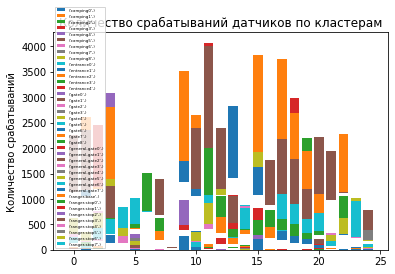

K-means ready!
SOM loaded!


## Заключение
### SOM
По итогу работы с алгоритмом SOM можно выделить следующие плюсы и минусы.

Плюсы:
1. Алгоритм является инструментом снижения размерности и визуализации данных;
2. Отличная видимость кластеров на карте отображения сработавших нейронов совместно с точками данных;
3. Отличная видимость аномалий при любых параметрах, что позволило нам быстро найти ответ на главный вопрос челленджа;
4. Сравнивая интуитивное разбиение и разбиение алгоритмом k-means, получили небольшую погрешность. Это говорит о том, что карта SOM вполне подходит для определения кластеров в данных.

Незначительные минусы: ресурсозатратность, что подразумевает длительную работу алгоритма; ограниченный выбор форм визуализации результата работы алгоритма (SOM-карта и U-матрица).

Лучшая репрезентативность визуализации была достигнута при параметрах размерность карты: 20х20, количество поколений: 10000, инициализация: PCA.

Мы смогли выявить аномалию заметив, что 4-осный грузовик проходят по мрашрутам грузовиков рейнджеров, несмотря на то, что у него нет на это разрешения. В визуализации в раскраске грузовиков рейнджеров отмечены вкрапления цвета 4-осных грузовиков.
